In [4]:
from datasets import load_dataset
dataset = load_dataset("mnist")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [5]:
import pandas as pd
import numpy as np
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [6]:
train_images = dataset['train']['image']
train_label = dataset['train']['label']

# Convert the list of images to a NumPy array
train_images_array = np.array([np.array(img) for img in train_images])

# Reshape the array to flatten each image
train_images_flattened = train_images_array.reshape(len(train_images_array), -1)

# Create a Pandas DataFrame from the flattened images
train_df = pd.DataFrame(train_images_flattened)

In [7]:
test_images = dataset['test']['image']
test_label = dataset['test']['label']

# Convert the list of images to a NumPy array
test_images_array = np.array([np.array(img) for img in test_images])

# Reshape the array to flatten each image
test_images_flattened = test_images_array.reshape(len(test_images_array), -1)

# Create a Pandas DataFrame from the flattened images
test_df = pd.DataFrame(test_images_flattened)

In [8]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [9]:
clf = Sequential([
    Dense(units=784, activation = 'relu'),
    Dense(units=128, activation = 'relu'),
    Dense(units=64, activation = 'relu'),
    Dense(units=10, activation='softmax')
])
clf.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(), metrics=['accuracy'],run_eagerly=True)

In [10]:
train_array = train_df.to_numpy()
train_labels = np.array(dataset['train']['label']).reshape(-1, 1)
clf.fit(train_array, train_labels, epochs=100)

Epoch 1/100


1875/1875 [==============================] - 49s 25ms/step - loss: 0.9577 - accuracy: 0.8919
Epoch 2/100
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2009 - accuracy: 0.9463
Epoch 3/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1641 - accuracy: 0.9548
Epoch 4/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1400 - accuracy: 0.9620
Epoch 5/100
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1081 - accuracy: 0.9704
Epoch 6/100
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0979 - accuracy: 0.9733
Epoch 7/100
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0776 - accuracy: 0.9789
Epoch 8/100
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0725 - accuracy: 0.9805
Epoch 9/100
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0654 - accuracy: 0.9826
Epoch 10/100
1875/1875 [==============================] - 47s 25ms/

In [41]:
test_array = test_df.to_numpy()
test_labels = np.array(dataset['test']['label']).reshape(-1, 1)

clf.evaluate(test_array,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 1.2909 - accuracy: 0.9769


[1.2908738851547241, 0.9768999814987183]

In [50]:
# Get the list of compiled metrics
metrics = clf.metrics

# Print the current metric values
for metric in metrics:
    print(f"{metric.name}: {metric.result()}")


loss: 1.2908738851547241
accuracy: 0.9768999814987183


In [42]:
from PIL import Image

def resize_image(image_path, output_path, width, height):
    # Open the image file
    image = Image.open(image_path)

    # Resize the image
    resized_image = image.resize((width, height))

    # Save the resized image
    resized_image.save(output_path)

# Example usage
input_image_path = "/content/Screenshot 2024-04-18 214216.png"
output_image_path = "/content/Screenshot 2024-04-18 214216_resized.png"
target_width = 28
target_height = 28

resize_image(input_image_path, output_image_path, target_width, target_height)


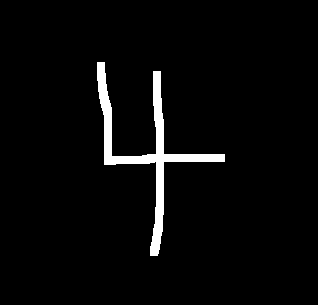

In [65]:
Image.open("/content/Screenshot 2024-04-18 214216.png")

In [63]:
prediction = clf.predict(np.array(Image.open("/content/Screenshot 2024-04-18 214216_resized.png").convert('L')).flatten().reshape(-1, 784))

1/1 [==============================] - 0s 20ms/step


In [64]:
print(f"Prediction: {np.argmax(prediction)}")

Prediction: 4
